In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation
import geopandas as gpd
pd.set_option('display.max_columns', None)
%matplotlib inline

In [175]:
df = pd.read_csv('data/Global_Landslide_Catalog_Export.csv')
df['event_date'] = pd.to_datetime(df['event_date'])
df['month'] = df['event_date'].dt.month
df['year'] = df['event_date'].dt.year


In [176]:
df.sample(10)

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,storm_name,photo_link,notes,event_import_source,event_import_id,country_name,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude,month,year
4134,www.ktvb.com,http://www.ktvb.com/news/Elmore-County-reopens...,5521,2013-09-12 00:00:00,NaN,"Fall Creek‎, Boise National Forest, Idaho",Some roads are reopening after mudslides cover...,"Fall Creek‎, Boise National Forest, Idaho",1km,mudslide,downpour,medium,unknown,0.0,NaN,NaN,NaN,NaN,glc,5521.0,United States,US,Idaho,14206.0,Mountain Home,40.70609,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-115.385500,43.423400,9,2013
6455,indianexpress,http://www.indianexpress.com/news/Landslide-bl...,804,2008-09-22 00:00:00,NaN,"Ghaggar, Morni, Panchkula",A Large number of fields in Umri village was d...,"Ghaggar, Morni, Panchkula",25km,landslide,rain,medium,unknown,NaN,NaN,NaN,NaN,NaN,glc,804.0,India,IN,Haryana,32162.0,Pinjaur,18.83135,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,77.080000,30.700000,9,2008
2559,news.au,"http://www.news.com.au/story/0,23599,24474320-...",833,2008-10-10 00:00:00,NaN,"Zaolin Village, Liulin County, Shanxi Province",The slide occurred at about 8am (11am Thursday...,"Zaolin Village, Liulin County, Shanxi Province",50km,landslide,unknown,medium,unknown,6.0,NaN,NaN,NaN,NaN,glc,833.0,China,CN,Shaanxi,0.0,Hujiamiao,1.54828,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,108.405800,34.966700,10,2008
10739,AKI Press,https://akipress.com/news:592223/,10893,2017-05-10 13:28:00,NaN,Landslide hits house,Landslide washes away summer house and shed,"Sharkyratma village, Kara-Kulja district, Osh ...",5km,landslide,rain,medium,unknown,0.0,0.0,NaN,NaN,All info gleaned from single sentence (paywall),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/13/2017 01:28:00 PM,12/07/2017 08:16:00 PM,02/15/2018 03:51:00 PM,74.484679,42.563454,5,2017
424,My Republica,http://www.myrepublica.com/news/3559/,10014,2016-08-06 13:37:00,NaN,"Landslide in Khabang, Nepal",NaN,"Khabang, Nepal",5km,landslide,rain,small,natural_slope,0.0,0.0,NaN,NaN,One house was fully covered by soil while few ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06/29/2017 01:37:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,82.941500,28.239000,8,2016
9969,TRIB Live,http://triblive.com/local/westmoreland/1198347...,10265,2017-02-23 18:40:00,NaN,Route 30 Rock Slide in North Huntingdon,A rock slide along Route 30 in North Huntingdo...,"13701-13799 US-30, Irwin, Pennsylvania, 15642",5km,rock_fall,unknown,small,above_road,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/18/2017 05:40:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-79.764978,40.346496,2,2017
10746,WebIndia123,https://news.webindia123.com/news/articles/Ind...,11155,2017-07-08 13:23:00,NaN,Landslides at Kiruphema village,Landslides following incessant rain destroy 16...,"Kiruphema village, Kohima, Nagaland",5km,landslide,continuous_rain,medium,natural_slope,0.0,0.0,NaN,NaN,Date estimated (numerous events),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/10/2017 01:23:00 PM,12/20/2017 03:41:00 PM,02/15/2018 03:51:00 PM,94.032257,25.720193,7,2017
8238,seattletimes.nwsource,http://seattletimes.nwsource.com/html/theweath...,3010,2011-01-16 00:00:00,NaN,"Mountain Loop hwy east of Verlot, WA","Soil saturated by rain gave way, under cutting...","Mountain Loop hwy east of Verlot, WA",25km,landslide,downpour,small,unknown,0.0,NaN,NaN,NaN,NaN,glc,3010.0,United States,US,Washington,1347.0,Darrington,15.44540,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-121.579000,48.117300,1,2011
9282,scotsman,http://www.scotsman.com/news/transport/scottis...,4578,2012-09-27 00:00:00,NaN,Lao Cai 

In [177]:
df.country_code.value_counts()

US    2992
IN    1265
PH     675
NP     481
CN     426
      ... 
JO       1
GU       1
SI       1
ME       1
AE       1
Name: country_code, Length: 139, dtype: int64

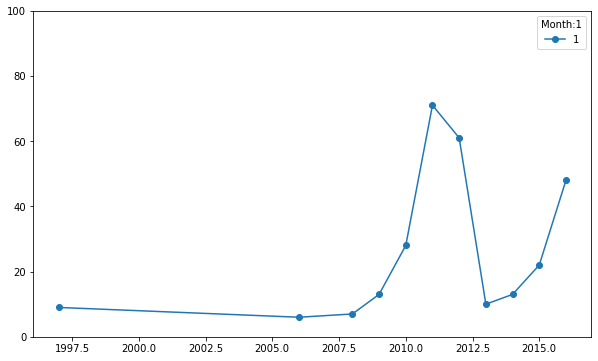

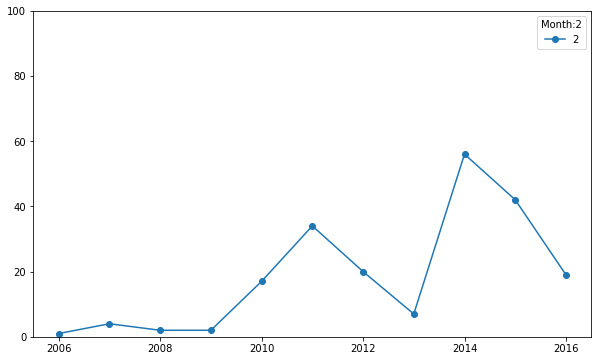

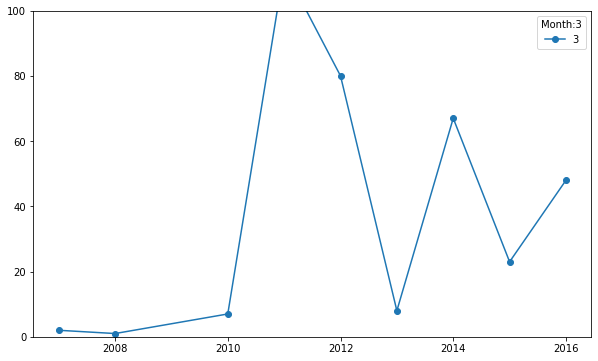

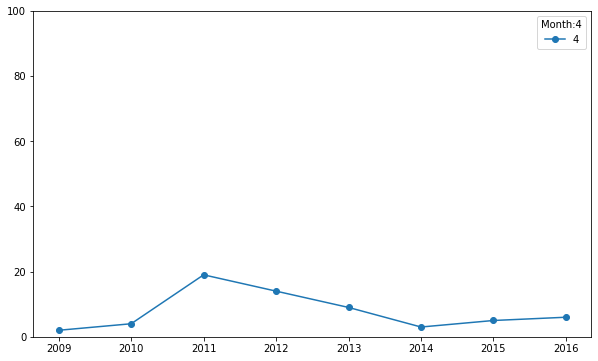

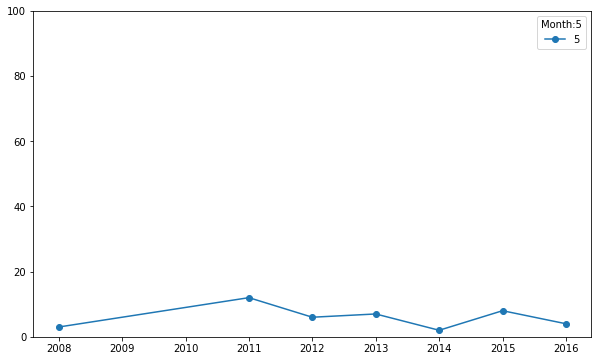

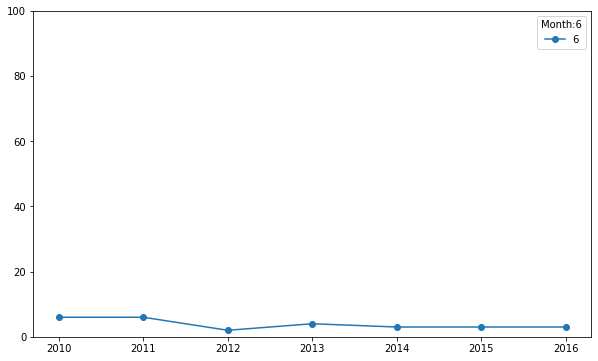

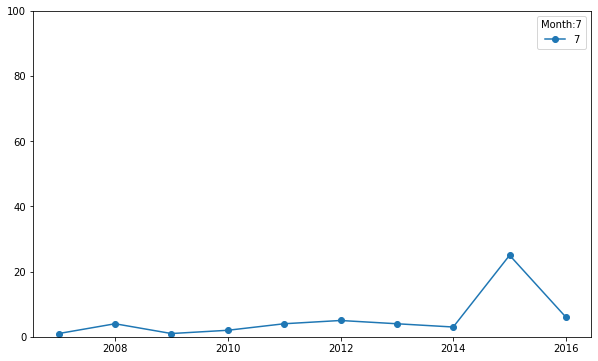

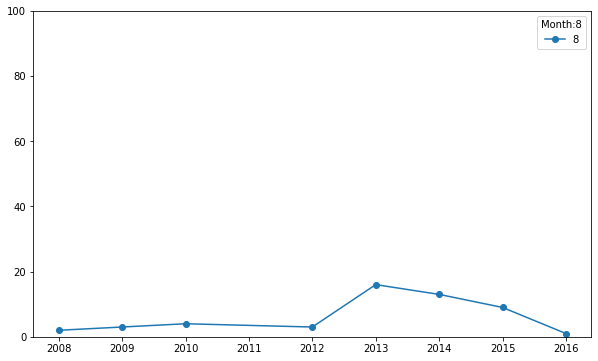

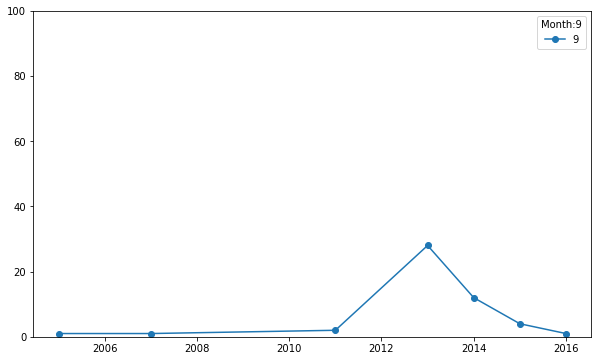

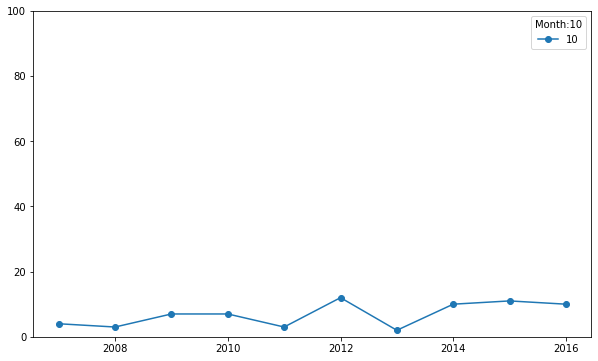

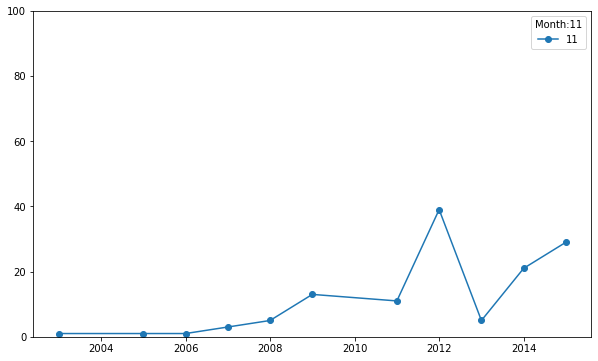

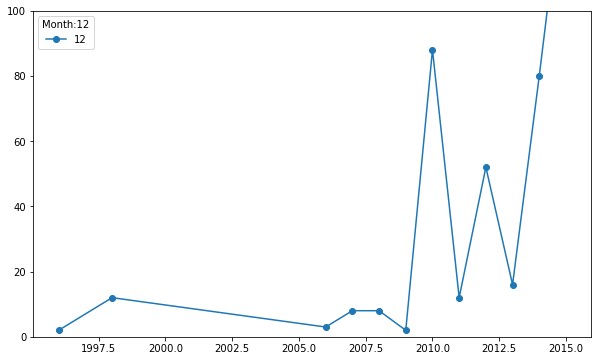

In [178]:
df_us = df[(df.country_code == 'US')]
df_us = df_us.query("admin_division_name in ['California','Oregon', 'Washington']")
#df_us = df_us[df_us.year != 2010]
#df_us = df_us[df_us.year != 2011]

#plot the number of landslides per year with color representing the month
for month in range(1, 13):
    fig, ax = plt.subplots(figsize=(10, 6))
    df_month = df_us[df_us.month == month]
    num_landslides = df_month.groupby('year').size()
    ax.plot(num_landslides.index, num_landslides.values, 'o-', label=month)
    ax.legend(title='Month'+':'+ str(month))
    ax.set_ylim(0,100)
#ax.set_yscale('log')

In [179]:
df_us.admin_division_name.value_counts()

Oregon        948
Washington    407
California    400
Name: admin_division_name, dtype: int64

In [ ]:
df_us.to_csv('data/df_us.csv')

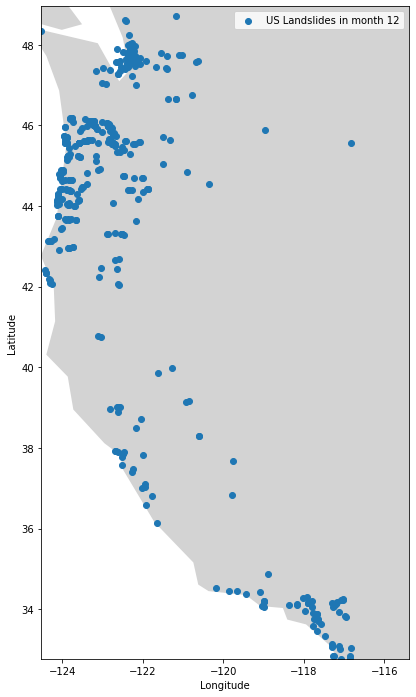

In [171]:

worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
#worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))

# Creating axes and plotting world map
#fig = plt.figure(figsize=(10, 10))
fig,  ax =  plt.subplots( figsize = (12,12))
worldmap.plot(color="lightgrey", ax=ax)
#worldmap.plot(color="lightgrey")

sc = ax.scatter([], [])


min_lon, min_lat, max_lon, max_lat = df_us['longitude'].min(), df_us['latitude'].min(), df_us['longitude'].max(), df_us['latitude'].max()
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)
#plt.xlim([-125, -70])
#plt.ylim([30, 50])

plt.xlabel("Longitude")
plt.ylabel("Latitude")

def animate(i):

    df_tmp = df_us[(df_us.month == i)]
    x = df_tmp['longitude']
    y = df_tmp['latitude']
    sc.set_offsets(np.c_[x,y])
    ax.legend([f"US Landslides in month {i}"])
    #ax.legend()
ani = matplotlib.animation.FuncAnimation(fig, animate, 
                frames=13, interval=1000, repeat=True) 


ani.save('./plots/test.gif', writer='imagemagick', fps=2)
plt.show()

/Users/s.bykov/opt/anaconda3/envs/venv_ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/s.bykov/opt/anaconda3/envs/venv_ml/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/s.bykov/opt/anaconda3/envs/venv_ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/s.bykov/opt/anaconda3/envs/venv_ml/lib

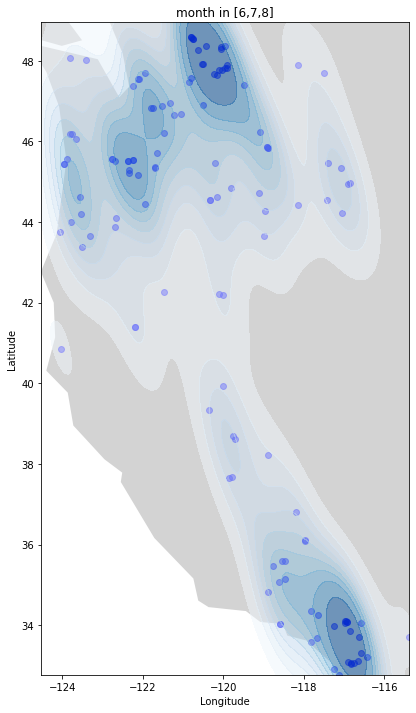

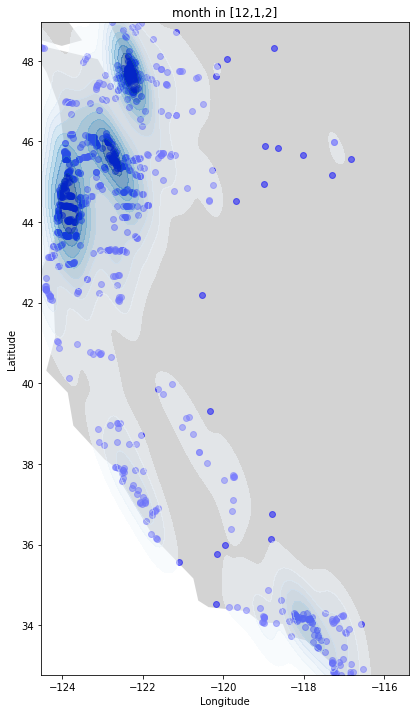

In [172]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

def plot_selection(ax, query="month in [12,1,2]", color='b'):


    worldmap.plot(color="lightgrey", ax=ax)

    #ax.set_xlim([-125, -70])
    #ax.set_ylim([30, 50])
    ax.set_xlim(min_lon, max_lon)
    ax.set_ylim(min_lat, max_lat)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    df_us_select = df_us.query(query)
    x = df_us_select['longitude']
    y = df_us_select['latitude']
    ax.scatter(x, y, color=color, alpha=0.5)
    ax.set_title(query)
    sns.kdeplot(x, y, shade=True, shade_lowest=False, cmap="Blues", alpha=0.5, ax = ax, bw_adjust = 0.5)

    return x,y

fig,  ax =  plt.subplots( figsize = (12,12))
plot_selection(ax, query="month in [6,7,8]", color='b')
fig,  ax =  plt.subplots( figsize = (12,12))
x,y = plot_selection(ax, query="month in [12,1,2]", color='b')

/Users/s.bykov/opt/anaconda3/envs/venv_ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/s.bykov/opt/anaconda3/envs/venv_ml/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


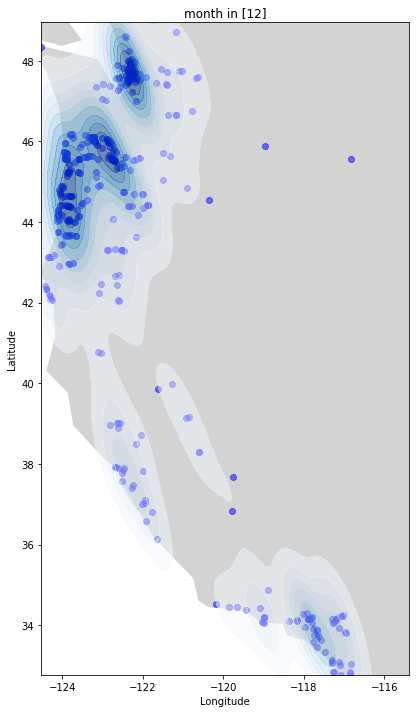

In [173]:
fig,  ax =  plt.subplots( figsize = (12,12))
x,y = plot_selection(ax, query="month in [12]", color='b')